In [1]:
import os
cwd = os.getcwd()

light_image_filename = os.path.join(cwd, "light.jpg")
dark_image_filename = os.path.join(cwd, "dark.jpg")
normal_image_filename = os.path.join(cwd, "normal.jpg")

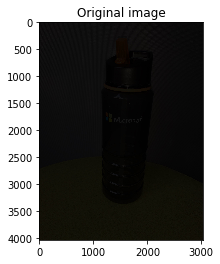

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as image

#plt.subplot(131), plt.imshow(image.imread(dark_image_filename)), plt.title("Dark")
#plt.subplot(132), plt.imshow(image.imread(light_image_filename)), plt.title("Light")
#plt.subplot(133), plt.imshow(image.imread(normal_image_filename)), plt.title("Normal")

original_image = image.imread(dark_image_filename)

plt.imshow(original_image), plt.title("Original image")

plt.show()

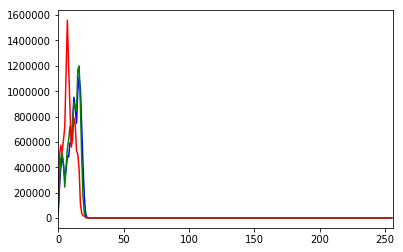

In [3]:
import cv2

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([original_image],[i],None,[256],[0,256])
    
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

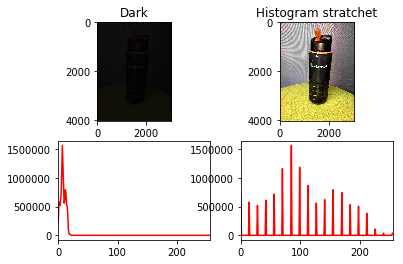

In [4]:
import numpy as np
from skimage import exposure, io

image = io.imread(dark_image_filename)
p2, p98 = np.percentile(image, (2, 98))
hist_stratch_image = exposure.rescale_intensity(image, in_range=(p2, p98))

img = io.imread(dark_image_filename)
for channel in range(img.shape[2]):  # equalizing each channel
    img[:, :, channel] = exposure.equalize_hist(img[:, :, channel])

color = ('b','g','r')
for i,col in enumerate(color):
    hist_dark = cv2.calcHist([image],[i],None,[256],[0,256])
    hist_stratch = cv2.calcHist([hist_stratch_image],[i],None,[256],[0,256])
    
plt.subplot(221), plt.imshow(image), plt.title("Dark")
plt.subplot(222), plt.imshow(hist_stratch_image), plt.title("Histogram stratchet")

plt.subplot(223), plt.plot(hist_dark,color = col), plt.xlim([0,256])
plt.subplot(224), plt.plot(hist_stratch,color = col), plt.xlim([0,256])


plt.show()

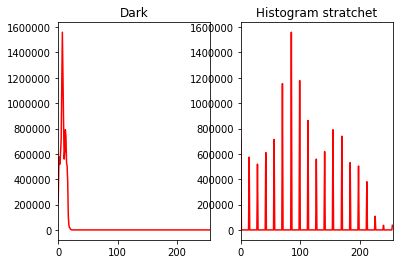

In [5]:
img = image

color = ('b','g','r')
for i,col in enumerate(color):
    hist_dark = cv2.calcHist([image],[i],None,[256],[0,256])
    hist_stratch = cv2.calcHist([hist_stratch_image],[i],None,[256],[0,256])


plt.subplot(121), plt.plot(hist_dark,color = col), plt.xlim([0,256]), plt.title("Dark")
plt.subplot(122), plt.plot(hist_stratch,color = col), plt.xlim([0,256]), plt.title("Histogram stratchet")

plt.show()